## Three steps to build a general architecture of a learning algorithm
### 1. Initialize parameters
### 2. Calculate cost functions and gradients
### 3. Using an optimization algorithm (gradient descent)

In [1]:
## Insert packages needed
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
from lr_utils import load_dataset

%matplotlib inline

In [2]:
## Load in the data (cat/non-cat)
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_dataset()

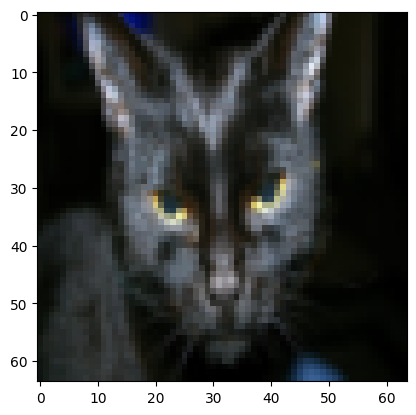

In [3]:
# Example picture
index = 25
plt.imshow(train_set_x_orig[index])

In [4]:
## Data shape: (example_num, height, width, channels)
train_size = train_set_x_orig.shape[0]
test_size = test_set_x_orig.shape[0]
pixel = train_set_x_orig[0].shape[0]

print('Number of training examples: {}'.format(train_size))
print('Number of testing examples: {}'.format(test_size))
print('Height/width of each image: {}'.format(pixel))
print('Each image size: ({}, {}, {})'.format(pixel, pixel, 3))

Number of training examples: 209
Number of testing examples: 50
Height/width of each image: 64
Each image size: (64, 64, 3)


In [5]:
## Reshape data sets so that images of size (pix, pix, 3) are flattened to single vectors of shape (pix*pix*3, examples)
train_set_x_flatten = np.transpose(train_set_x_orig.reshape(train_set_x_orig.shape[0], -1))
test_set_x_flatten = np.transpose(test_set_x_orig.reshape(test_set_x_orig.shape[0], -1))

print('Flattened train set: {}'.format(train_set_x_flatten.shape))
print('Train set data shape: {}'.format(train_set_y_orig.shape))
print('Flattened test set: {}'.format(test_set_x_flatten.shape))
print('Test set data shape: {}'.format(test_set_y_orig.shape))
print ('Sanity check after reshaping: {}'.format(train_set_x_flatten[0:5,0]))

Flattened train set: (12288, 209)
Train set data shape: (1, 209)
Flattened test set: (12288, 50)
Test set data shape: (1, 50)
Sanity check after reshaping: [17 31 56 22 33]


In [6]:
train_set_x = train_set_x_flatten/255.0
test_set_x = test_set_x_flatten/255.0

In [7]:
def sigmoid(z):
    '''
        z: A scalar of numpy array of any size
    '''

    s = 1 / (1+np.exp(-z))

    return s

In [8]:
## Implement parameter initialization
def initialize_params(dim):
    '''
        dim: size of the w vector, or number of params

        Returns:
        w: initialized vector of shape (dim, 1)
        b: initialized scalar (corresponds to the bias)
    '''

    w = np.zeros([dim, 1])
    b = 0

    return w, b

In [9]:
def propagate(w, b, X, Y):
    '''
        w: a nparray of size (pix*pix*3, 1)
        b: a scalar
        X: data of size (pix*pix*3, example_num)
        Y: label vector

        Return:
        cost: negative log-likelihood cost of logistic regression
        dw: gradient of loss w.r.t w
        db: gradient of loss w.r.t b
    '''

    m = X.shape[1] ## Should be number of examples
    
    ## Forward Propagation
    A = sigmoid(np.dot(w.T, X)+b)  # compute activation
    cost = -np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)) / m  # compute cost
    cost = np.squeeze(cost)

    # Backward Propagation
    dw = np.dot(X, (A-Y).T) / m
    db = np.sum(A-Y) / m
    grads = {'dw':dw, 'db':db}

    return grads, cost

In [20]:
## Optimization: update the parameters using gradient descent
## Learn w&b by minimizing the cost function
## Update rule: theta = theta - lr*d_theta

def optimize(w, b, X, Y, num_iter, lr, print_cost=False):
    '''
        Returns:
        params: dictionary containing w&b
        grads: dictionary containing the gradients of w&b w.r.t cost function
        costs: list of all costs during optimization, used to plot the learning curve
    '''

    costs = []
    for i in range(num_iter):
        grads, cost = propagate(w, b, X, Y)

        # Retrieve derivatives from grads
        dw = grads['dw']
        db = grads['db']

        w = w - lr*dw
        b = b - lr*db

        if i%100 == 0:
            costs.append(cost)
            if print_cost:
                print('Cost after iteration %i: %f' %(i, cost))

        params = {'w': w, 'b': b}
        grads = {'dw': dw, 'db': db}

    return params, grads, costs

In [21]:
def predict(w, b, X):
    m = X.shape[1]  # number of examples
    y_pred = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X)+b)

    for i in range(A.shape[1]):
        y_pred[0][i] = 1 if A[0][i] > 0.5 else 0

    return y_pred

In [22]:
def model(x_train, y_train, x_test, y_test, num_iter=2000, lr=0.5, print_cost=False):
    w, b = initialize_params(x_train.shape[0])
    params, grads, costs = optimize(w, b, x_train, y_train, num_iter, lr, print_cost)

    w = params['w']
    b = params['b']

    y_pred_train = predict(w, b, x_train)
    y_pred_test = predict(w, b, x_test)

    print('Train accuracy: {}'.format(1-np.mean(np.abs(y_pred_train-y_train))))
    print('Test accuracy: {}'.format(1-np.mean(np.abs(y_pred_test-y_test))))

    d = {'costs':costs,
        'y_pred_train': y_pred_train,
        'y_pred_test': y_pred_test,
        'w': w,
        'b': b,
        'learning_rate': lr,
        'num_iter': num_iter}

    return d

In [23]:
d = model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, num_iter=2000, lr=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
Train accuracy: 0.9904306220095693
Test accuracy: 0.7


Learning rate is: 0.010000
Train accuracy: 0.9952153110047847
Test accuracy: 0.7

-------------------------------------------------------

Learning rate is: 0.001000
Train accuracy: 0.9138755980861244
Test accuracy: 0.6799999999999999

-------------------------------------------------------

Learning rate is: 0.005000
Train accuracy: 0.9904306220095693
Test accuracy: 0.7

-------------------------------------------------------

Learning rate is: 0.000100
Train accuracy: 0.7129186602870814
Test accuracy: 0.4

-------------------------------------------------------



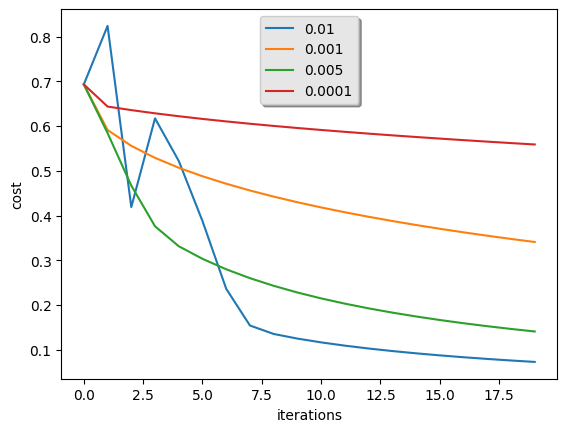

In [27]:
learning_rates = [0.01, 0.001, 0.005, 0.0001]
models = {}
for i in learning_rates:
    print ('Learning rate is: %f' %i)
    models[str(i)] = model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, num_iter = 2000, lr = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]['costs']), label= str(models[str(i)]['learning_rate']))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')